Using the geopandas library, turn the latitude and longitude columns into a geographical Point data type then make a geodataframe. Plot the path of Hurricane Michael onto the US map in the GeoJSON file.

In [1]:
import pandas as pd
import geopandas as gpd 
import matplotlib.pyplot as plt

from shapely.geometry import Point  #transform latitude/longitude to geo-coordinate data

%matplotlib inline

In [2]:
df = pd.read_csv('datasets/hurricaneMichael.csv')
df.head()

,AdvisoryNumber,Date,Lat,Long,Wind,Pres,Movement,Type,Name,Received,Forecaster
0,1,10/6/2018 17:00,18.0,86.6,30,1006,NW at 6 MPH (325 deg),Potential Tropical Cyclone,Fourteen,10/6/2018 16:50,Beven
1,1A,10/6/2018 20:00,18.3,86.6,30,1004,N at 6 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/6/2018 19:32,Avila
2,2,10/6/2018 23:00,18.8,86.6,30,1004,N at 7 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/6/2018 22:38,Avila
3,2A,10/7/2018 2:00,18.4,87.1,35,1004,NW at 5 MPH (320 deg),Potential Tropical Cyclone,Fourteen,10/7/2018 1:38,Berg
4,3,10/7/2018 5:00,18.6,86.9,35,1004,NNW at 3 MPH (340 deg),Tropical Depression,FOURTEEN,10/7/2018 4:53,Berg


In [4]:
df.columns

Index(['AdvisoryNumber', 'Date', 'Lat', 'Long', 'Wind', 'Pres', 'Movement',
       'Type', 'Name', 'Received', 'Forecaster'],
      dtype='object')

In [5]:
df['Long'] = 0 - df['Long']

In [8]:
df['coordinates'] = list(df[['Long', 'Lat']].values)

In [10]:
df['coordinates'] = df['coordinates'].apply(Point)

In [12]:
#change to geolocation data 
hurr_geo = gpd.GeoDataFrame(df, geometry='coordinates')

In [13]:
type(hurr_geo['coordinates'])

geopandas.geoseries.GeoSeries

In [38]:
df.head()

,AdvisoryNumber,Date,Lat,Long,Wind,Pres,Movement,Type,Name,Received,Forecaster,coordinates
0,1,10/6/2018 17:00,18.0,-86.6,30,1006,NW at 6 MPH (325 deg),Potential Tropical Cyclone,Fourteen,10/6/2018 16:50,Beven,POINT (-86.59999999999999 18)
1,1A,10/6/2018 20:00,18.3,-86.6,30,1004,N at 6 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/6/2018 19:32,Avila,POINT (-86.59999999999999 18.3)
2,2,10/6/2018 23:00,18.8,-86.6,30,1004,N at 7 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/6/2018 22:38,Avila,POINT (-86.59999999999999 18.8)
3,2A,10/7/2018 2:00,18.4,-87.1,35,1004,NW at 5 MPH (320 deg),Potential Tropical Cyclone,Fourteen,10/7/2018 1:38,Berg,POINT (-87.09999999999999 18.4)
4,3,10/7/2018 5:00,18.6,-86.9,35,1004,NNW at 3 MPH (340 deg),Tropical Depression,FOURTEEN,10/7/2018 4:53,Berg,POINT (-86.90000000000001 18.6)


#### mapping

In [14]:
map_df = gpd.read_file('datasets/US_states(5m).json')
map_df.head()

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry
0,0400000US01,01,Alabama,,50645.326,"(POLYGON ((-88.124658 30.28364, -88.0868119999..."
1,0400000US02,02,Alaska,,570640.950,"(POLYGON ((-166.10574 53.988606, -166.075283 5..."
2,0400000US04,04,Arizona,,113594.084,"POLYGON ((-112.538593 37.000674, -112.534545 3..."
3,0400000US05,05,Arkansas,,52035.477,"POLYGON ((-94.042964 33.019219, -94.043036 33...."
4,0400000US06,06,California,,155779.220,"(POLYGON ((-122.421439 37.869969, -122.421341 ..."


In [20]:
#only contiguous US
map48 = map_df.loc[map_df['NAME'].isin(['Alaska', 'Hawaii', 'Puerto Rico']) == False]

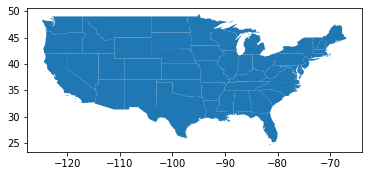

In [23]:
map48.plot()

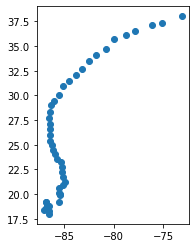

In [18]:
hurr_geo.plot()

Text(0.5, 1, 'Hurricane Michael Path')

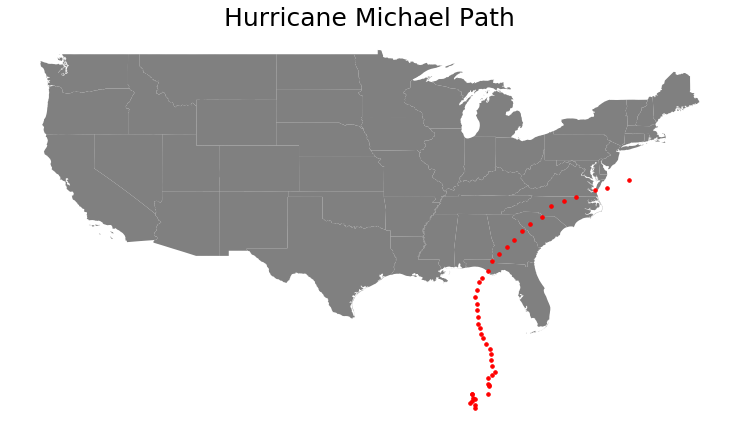

In [39]:
#plot coordinates on top of map graph

#this is to set the size of the borders
fig, ax = plt.subplots(1, figsize=(13,9))

#this is the map
basemap = map48.plot(ax=ax, color = 'gray')

#plot coordinates on top of map graph
hurr_geo.plot(ax=basemap, color='red', marker=".", markersize=50)

#take off axis numbers
ax.axis('off')

#put title on map
ax.set_title("Hurricane Michael Path", fontsize=25, fontweight=3)